In [26]:
# import needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
orig_df = pd.read_csv('dataset/boston.csv')
df = orig_df.copy()

**Input features (predictor variables):**
<br>
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per 10,000[ /10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population <br>
**Output variable (target variable):**
14) MEDV: Median value of owner-occupied homes in 1000′𝑠[𝑘 ]


In [3]:
df.info() # basic info regarding df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()  # to know if there is null vaues

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

since there's no null value,string value, or conflicting values, we dont have to modify the dataframe. It is ready for data analyzation

<function matplotlib.pyplot.show(close=None, block=None)>

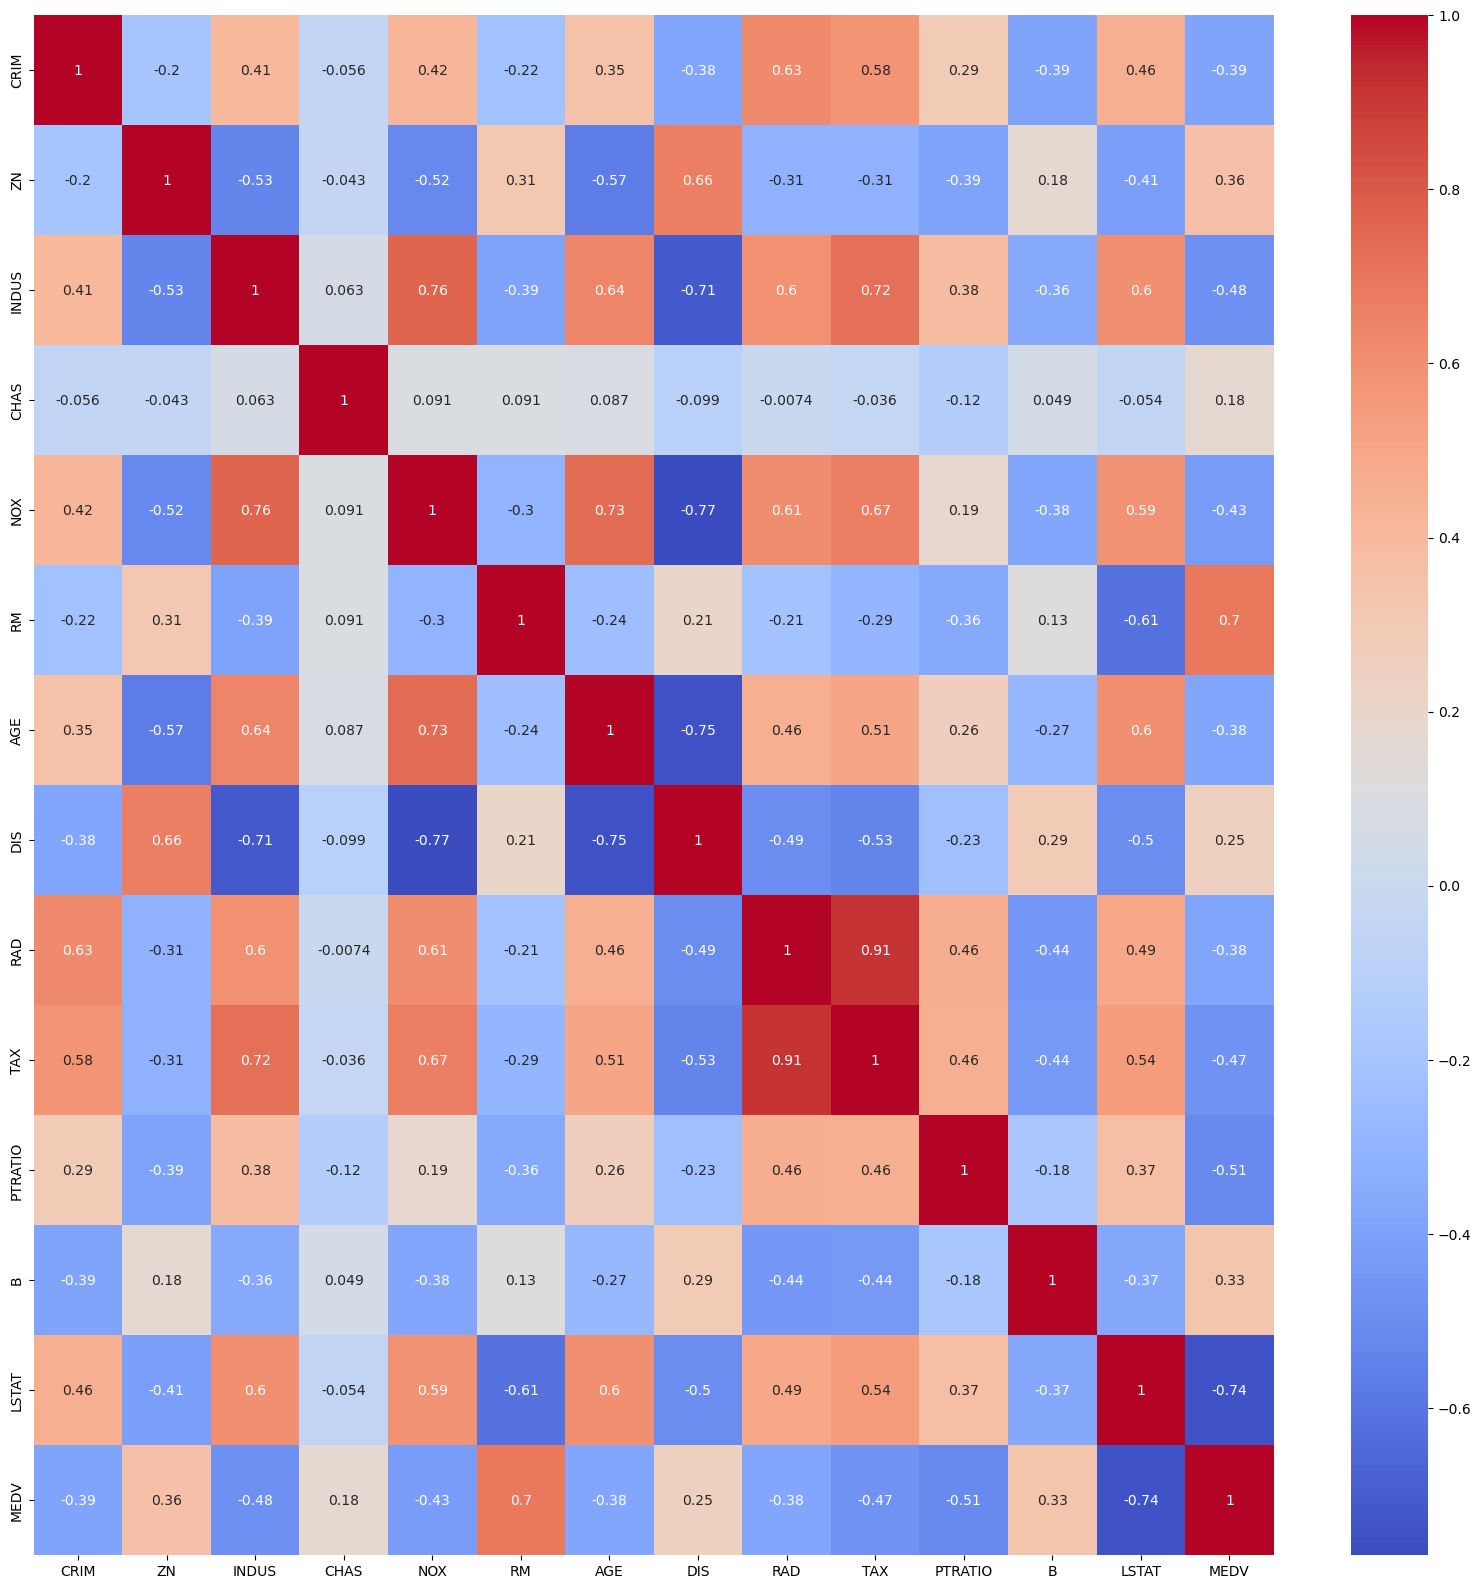

In [5]:
# See the correlation

corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm',ax=ax)
plt.show

Accessibility to radial highways and full-value property tax has the highest correlation

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Perform Standard Scaler to transform data to zero mean and unit value** <br>
this help fix outliers

this also may ruin the model( remove if necessary)

In [15]:
# separate features to predictor
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [19]:
X.head() # see if the data is separated

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [78]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=18, random_state=42)
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=18, random_state=42)

In [79]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [80]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.900763737593803
R-squared: 0.9058992535199324


mse and rsquared may change depends on the n_estimator applied, started at 100 as base, it gives a result of mse:7.8 and r:87, i restart the machine learning model and gradually change the number until it reach its sweet spot

In [81]:
'''
Random Forest provides a feature importance attribute that can help you understand which features are most influential in making predictions.

'''

# Get feature importances
feature_importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

CRIM: 0.03403279961876948
ZN: 0.001147853842756344
INDUS: 0.011829003586943991
CHAS: 0.00018570789726208493
NOX: 0.016979014656495595
RM: 0.46589337474256853
AGE: 0.011434405972102636
DIS: 0.07299831745863726
RAD: 0.004593162406046072
TAX: 0.017257678187496944
PTRATIO: 0.01851090820444862
B: 0.012581690357672716
LSTAT: 0.3325560830687996


as we can see, the rm or the room per dwelling are most influential in making the prediction.

### using the predicted values, we can attached it to the old dataframe, so you can see how most closely the random forest predicted the values

In [88]:
# Get the index of the test set
test_index = X_test.index

In [90]:
# Create a DataFrame for the predicted values with the correct index
predicted_df = pd.DataFrame({'Predicted_MEDV': y_pred}, index=test_index)

# Merge the original DataFrame with the predicted DataFrame on the index
data_with_predictions = pd.merge(df, predicted_df, left_index=True, right_index=True)


In [95]:
data_with_predictions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Predicted_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,27.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,32.583333
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9,19.188889
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9,20.783333
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,20.2,17.711111
